# <span style="color:#0b486b">  FIT5215: Deep Learning (2023)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Mr **Tuan Nguyen** | tuan.Ng@monash.edu  <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Ravi Kumar**  <br/>
Firstname: **Gautam**    <br/>
Student ID: **33197970**    <br/>
Email: **gaut0002@student.monash.edu**    <br/>
Your tutorial time: **1:00pm Thursdays**    <br/>
***

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:59pm Sunday, 10 September 2023</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instruction carefully.

## <span style="color:#0b486b">Instruction</span>

This notebook has been prepared for you to complete Assignment 1. The theme of this assignment is about practical knowledge and skills in deep neural networks, including feedforward and convolutional neural networks. Some sections have been partially completed to help you get started. **The total marks for this notebook is 100**.

* Before getting started, you should read the entire notebook carefully once to understand what you need to do. <br/>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br>

This assignment contains **three** parts:

* **Part 1**: Questions on theory and knowledge on deep learning **[35 points], 35%**
* **Part 2**: Coding assessment on TensorFlow for Deep Neural Networks (DNN) **[25 points], 25%**
* **Part 3**: Coding assessment on TensorFlow for Convolution Neural Networks (CNN) **[40 points], 40%**

**Hint**: This assignment was essentially designed based on the lectures and tutorials sessions covered from Week 1 to Week 5. You are strongly recommended to go through these contents thoroughly which might help you to complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment01_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. 

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment01_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment01_solution.ipynb**:  this is your Python notebook solution source file.
1.	**Assignment01_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

Since the notebook is quite big to load and work together, one recommended option is to split solution into three parts and work on them seperately. In that case, replace **Assignment01_solution.ipynb** by three notebooks: **Assignment01_Part1_solution.ipynb**, **Assignment01_Part2_solution.ipynb** and **Assignment01_Part3_solution.ipynb**

**You can run your codes on Google Colab. In this case, you have to make a copy of your Google colab notebook including the traces and progresses of model training before submitting.** 

You also need to store your trained models to folder <span style="color:red; font-weight:bold">*./models*</span> with recognizable file names (e.g., Part3_Sec3_2_model.h5).

## <span style="color:#0b486b">Part 1: Theory and Knowledge Questions</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 35 points]<span></div>

The first part of this assignment is to demonstrate your knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the lectures and tutorials from weeks 1 to 3**. Going through these materials before attempting this part is highly recommended.

####  <span style="color:red">**Question 1.1**</span> **Activation function plays an important role in modern Deep NNs. For each of the activation function below, state its output range, find its derivative (show your steps), and plot the activation fuction and its derivative**

<span style="color:red">**(a)**</span> Exponential linear unit (ELU): $\text{ELU}(x)=\begin{cases}
0.1\left(\exp(x)-1\right) & \text{if}\,x\leq0\\
x & \text{if}\,x>0
\end{cases}$ 
<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

<span style="color:red">**(b)**</span> Gaussian Error Linear Unit (GELU): $\text{GELU}(x)=x\Phi(x)$ where $\Phi(x)$ is the `probability cummulative function` of the standard Gaussian distribution or $\Phi(x) = \mathbb{P}\left(X\leq x\right)$ where $X\sim\mathcal{N}\left(0,1\right)$. In addition, the GELU activation fuction (the link for the [main paper](https://arxiv.org/pdf/1606.08415v5.pdf)) has been currently widely used in the state-of-the-art Vision for Transformers (e.g., here is the link for [the main ViT paper](https://arxiv.org/pdf/2010.11929v2.pdf)). 
<div style="text-align: right"><span style="color:red">[2 points]</span></div> 

*Your ansewers here*


a) When x <= 0,

   The output range is -0.1(when x = -infinity) to 0(when x = 0)
   
   When x > 0, the output is from 0(exclusive) to infinity
   
   ELU'(x) when x <= 0
   
   (0.1(exp(x) -1))' = 0.1'*(exp(x) -1) + 0.1*(exp(x) -1)' = 0.1*(exp(x))' - 0.1*1' = 0.1*exp(x)
   
   ELU'(x) when x > 0 = x' = 1 
   

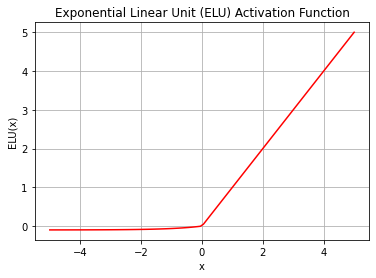

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
np.random.seed(123)
tf.random.set_seed(123)
def ELU(z):
    return tf.where(z <= 0, 0.1 * (tf.math.exp(z) - 1), z)

z = np.linspace(-5, 5, 200)
plt.plot(z, ELU(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"ELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [ ]:
z = np.linspace(-5, 5, 200)
with tf.GradientTape(persistent=True) as g:
    x = tf.Variable(z)
    y = ELU(x)
grads = g.gradient(y,x)
plt.plot(z, grads.numpy(), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"Derivative of ELU", fontsize=14)
plt.axis([-5, 5, min(grads.numpy())- 1E-2, max(grads.numpy()) + 1E-2])
plt.show()

b) GELU(x) = xΦ(𝑥) = 0.5x(1 + tanh[sqrt(2/π)(x + 0.044715*x^3)])

output range is -infinity to infinity(linear function)

GELU'(x) = (0.5x(1 + tanh[sqrt(2/π)(x + 0.044715*x^3)]))' 
         
         = 0.5*tanh[sqrt(2/π)(x + 0.044715*x^3)] + 0.5x*(tanh[sqrt(2/π)(x + 0.044715*x^3)])' 
         
         = 0.5*tanh[sqrt(2/π)(x + 0.044715*x^3)] + 0.5x*sec^2[sqrt(2/π)(x + 0.044715*x^3)]*(sqrt(2/π)(x + 0.044715*x^3))'
         
         = 0.5*tanh[sqrt(2/π)(x + 0.044715*x^3)] + 0.5x*sec^2[sqrt(2/π)(x + 0.044715*x^3)]*(sqrt(2/π)(1 + 3*0.044715*x^2))
         
         = 0.5*tanh[sqrt(2/π)(x + 0.044715*x^3)] + 0.5x*sec^2[sqrt(2/π)(x + 0.044715*x^3)]*(sqrt(2/π)(1 + 0.134145*x^2))

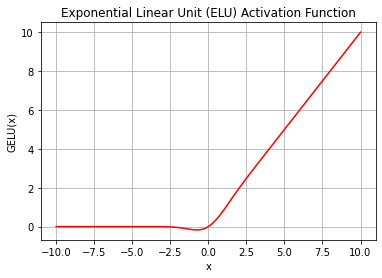

In [2]:
def GELU(x):
    return 0.5*x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

z = np.linspace(-5, 5, 200)
plt.plot(z, GELU(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title("GELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [ ]:
z = np.linspace(-5, 5, 200)
with tf.GradientTape(persistent=True) as g:
    x = tf.Variable(z)
    y = GELU(x)
grads = g.gradient(y,x)
plt.plot(z, grads.numpy(), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"Derivative of GELU", fontsize=14)
plt.axis([-5, 5, min(grads.numpy())- 1E-2, max(grads.numpy()) + 1E-2])
plt.show()

<span style="color:#0b486b"> **Numpy is possibly being used in the following questions. You need to import numpy here.** </span>

In [ ]:
import numpy as np

####  <span style="color:red">**Question 1.2**</span> **Assume that we feed a data point $x$ with a ground-truth label $y=3$ to the feed-forward neural network with the `ReLU activation` function as shown in the following figure**
<img src="Figures/Q2_P1.png" width="500" align="center"/>


<span style="color:red">**(a)**</span>  What is the numerical value of the latent presentation $h^1(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

<span style="color:red">**(b)**</span>  What is the numerical value of the latent presentation $h^2(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

<span style="color:red">**(c)**</span>  What is the numerical value of the logit $h^3(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


<span style="color:red">**(d)**</span>  What is the corresonding prediction probabilities $p(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

<span style="color:red">**(e)**</span>  What is the predicted label $\hat{y}$? Is it a correct and an incorect prediction? Remind that $y=3$.
<div style="text-align: right"><span style="color:red">[3 point]</span></div> 


<span style="color:red">**(f)**</span>  What is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$? Remind that $y=3$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

<span style="color:red">**(g)**</span>  Why the cross-entropy loss caused by the feed-forward neural network at $(x,y)$ (i.e., $\text{CE}(1_y, p(x))$) is always non-negative? When does this $\text{CE}(1_y, p(x))$ loss get the value $0$? Note that you need to answer this question for a general pair $(x,y)$ and a general feed-forward neural network with for example $M=4$ classes?   
<div style="text-align: right"><span style="color:red">[3 point]</span></div> 


**You need to show both formulas and numerical results for earning full mark. Although it is optional, it is great if you show your numpy code for your computation.**

a) $h^1(x)$ = ReLu([$(1*1) + (-1*-1) + (-2 * 2) + 1, (1 *-1) + (-1 * 0.5) + (-2 * 1) + 0, (1 * -2) + (-1 * 1) + (-2 * 1) + 1, (1 * 0) + (-1 * 0) + (-2 * 1) + 0]^T$) = ReLu($[-1,-3.5,-6,-2]^T$) = $[0,0,0,0]^T$

b) $h^2(x)$ = ReLu[$(0 x -1) + (0 x 1) + (0 x 0) + (0 * 1) + 0, (0 x 1) + (0 x 1) + (0 x 0) + (0 * -2) + 0.5, (0 x 0.5) + (0 x -1) + (0 x 2) + (0 * 0) + 1]^T$, = ReLu$[0,0.5,1]^T$ = $[0,0.5,1]^T$

c) logit ($h^3(x)$) = $[(0*1) + (0.5*-2) + (1 * 0) - 1, (0 *0) + (0.5 * 2) + (1 * 0) + 1, (0 * 1) + (0.5 * -1) + (1 * 1) - 1, (0 * 0.5) + (0.5 * 1) + (1 * 2) + 1]^T$ = $[-2, 2,-0.5,3.5]^T$ 

d) p(x) = softmax($h^3(x)$) = [(e^(-2))/(e^(-2)+e^(2)+e^(-0.5)+e^(3.5)) , (e^(2))/(e^(-2)+e^(2)+e^(-0.5)+e^(3.5)) , (e^(-0.5))/(e^(-2)+e^(2)+e^(-0.5)+e^(3.5)) , (e^(3.5))/(e^(-2)+e^(2)+e^(-0.5)+e^(3.5))] = [0.00327643, 0.17893878, 0.01470253, 0.80208694]

e) the predicted label will be the label with the highest probability. In this case, yhat = 4 with a probablity of 0.80208694. 
This contradicts the ground truth of y = 3, and is therefore an incorrect prediction

f) Cross entropy loss = -log(0.01470253) = 4.21510975

g) CE(1𝑦,𝑝(𝑥) takes the negative log of the calculated probability from the neural network of the ground truth. The probability will be between 0 and 1, the log of which will always be a negative number, which will then be negated to give a positive number. To get the CE value of 0, the neural network will haveg to get a softmax probability of 1 for the predicted label matching the ground truth, and 0 for all the other labels that are incorrect, as -log(1) = log(1) = 0. For example, for M=4 classes, if y = 3, then the prediction probability Pr(y = 3 | x) = 1 and Pr(y = {1,2,4} | x) = 0

For **Question 1.3**, you have two options: **(i)** *do forward, backward propagation, and SGD update for `one data example`* (**15 points**) and **(ii)** *do forward, backward propagation, and SGD update for `a batch of data examples`* (**20 points**). You can choose either **(i)** or **(ii)** to proceed.   

### <span style="color:red">**Option 1**</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this option: 15 points]<span></div>

####  <span style="color:red">**Question 1.3**</span> **Assume that we are constructing a multilayered feed-forward neural network for a classification problem with three classes where the model parameters will be generated randomly using your student ID. The architecture of this network is ($3 (Input)\rightarrow 5(ELU) \rightarrow 3(Output)$) as shown in the following figure. Note that the ELU has the same formula as the one in Q1.1.**

<img src="./Figures/Q3_P1_1.png" width="500" align="center"/>

We feed a data example $x$ with the label $y$ as shown in the figure. Answer the following questions.

**You need to show both formulas, numerical results, and your numpy code for your computation for earning full marks.**

In [ ]:
#Code to generate random matrices and biases for W1, b1, W2, b2
import numpy as np
student_id = 33197970           #insert your student id here for example 1234    
np.random.seed(student_id)
W1 = np.random.rand(5,3)
b1 = np.random.rand(5,1)
W2 = np.random.rand(3,5)
b2 = np.random.rand(3,1)

**Forward propagation**

<span style="color:red">**(a)**</span>  What is the value of $\bar{h}^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


*Show your fomular*



In [ ]:
# Show your code
x = [1,-2,-2]
h^-1 = 

<span style="color:red">**(b)**</span>  What is the value of $h^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

*Show your fomular*



In [ ]:
#Show your code



<span style="color:red">**(c)**</span>  What is the predicted value $\hat{y}$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

*Show your fomular*



In [ ]:
#Show your code



<span style="color:red">**(d)**</span>  Suppose that we use the cross-entropy (CE) loss. What is the value of the CE loss $l$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

*Show your fomular*



In [ ]:
#Show your code



**Backward propagation**

<span style="color:red">**(e)**</span> What are the derivatives $\frac{\partial l}{\partial h^{2}},\frac{\partial l}{\partial W^{2}}$, and $\frac{\partial l}{\partial b^{2}}$? 
<div style="text-align: right"><span style="color:red">[4 points]</span></div>

*Show your fomular*



In [ ]:
#Show your code



<span style="color:red">**(f)**</span> What are the derivatives $\frac{\partial l}{\partial h^{1}}, \frac{\partial l}{\partial \bar{h}^{1}},\frac{\partial l}{\partial W^{1}}$, and $\frac{\partial l}{\partial b^{1}}$? 
<div style="text-align: right"><span style="color:red">[4 points]</span></div>

*Show your fomular*



In [ ]:
#Show your code



**SGD update**

<span style="color:red">**(g)**</span> Assume that we use SGD with learning rate $\eta=0.01$ to update the model parameters. What are the values of $W^2, b^2$ and $W^1, b^1$ after updating?
<div style="text-align: right"><span style="color:red">[3 points]</span></div>

*Show your fomular*



In [ ]:
#Show your code



### <span style="color:red">**Option 2**</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this option: 20 points]<span></div>

####  <span style="color:red">**Question 1.3**</span> **Assume that we are constructing a multilayered feed-forward neural network for a classification problem with three classes where the model parameters will be generated randomly using your student ID. The architecture of this network is ($3 (Input)\rightarrow 5(ELU) \rightarrow 3(Output)$) as shown in the following figure. Note that the ELU has the same formula as the one in Q1.1.**

<img src="./Figures/Q3_P1_2.png" width="500" align="center"/>

We feed a batch $X$ with the labels $Y$ as shown in the figure. Note that $x^{T}$ represents the transpose vector of the vector $x$. Answer the following questions.

**You need to show both formulas, numerical results, and your numpy code for your computation for earning full marks.**

In [ ]:
#Code to generate random matrices and biases for W1, b1, W2, b2
import numpy as np
student_id = 33197970           #insert your student id here for example 1234    
np.random.seed(student_id)
W1 = np.random.rand(5,3)
b1 = np.random.rand(5,1)
W2 = np.random.rand(3,5)
b2 = np.random.rand(3,1)

**Forward propagation**

<span style="color:red">**(a)**</span>  What is the value of $\bar{h}^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


*Show your formula*



In [ ]:
#Show your code



<span style="color:red">**(b)**</span>  What is the value of $h^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

*Show your formula*


In [ ]:
#Show your code



<span style="color:red">**(c)**</span>  What is the predicted value $\hat{y}$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

*Show your formula*


In [ ]:
#Show your code



<span style="color:red">**(d)**</span>  Suppose that we use the cross-entropy (CE) loss. What is the value of the CE loss $l$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

*Show your formula*


In [ ]:
#Show your code



**Backward propagation**

<span style="color:red">**(e)**</span> What are the derivatives $\frac{\partial l}{\partial h^{2}},\frac{\partial l}{\partial W^{2}}$, and $\frac{\partial l}{\partial b^{2}}$? 
<div style="text-align: right"><span style="color:red">[6 points]</span></div>

*Show your formula*


In [1]:
#Show your code



<span style="color:red">**(f)**</span> What are the derivatives $\frac{\partial l}{\partial h^{1}}, \frac{\partial l}{\partial \bar{h}^{1}},\frac{\partial l}{\partial W^{1}}$, and $\frac{\partial l}{\partial b^{1}}$? 
<div style="text-align: right"><span style="color:red">[6 points]</span></div>

*Show your formula*


In [ ]:
#Show your code



**SGD update**

<span style="color:red">**(g)**</span> Assume that we use SGD with learning rate $\eta=0.01$ to update the model parameters. What are the values of $W^2, b^2$ and $W^1, b^1$ after updating?
<div style="text-align: right"><span style="color:red">[4 points]</span></div>

*Show your formula*


In [ ]:
#Show your code



## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 25 points]<span></div>

The first part of this assignment is to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 4**. Going through these materials before attempting this assignment is highly recommended.

In the first part of this assignment, you are going to work with the **FashionMNIST** dataset for *image recognition task*. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

####  <span style="color:red">**Question 2.1**</span>. Load the Fashion MNIST using Keras datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We first use keras incoporated in TensorFlow 2.x for loading the training and testing sets.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.random.set_seed(1234)

We first use keras datasets in TF 2.x to load Fashion MNIST dataset.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full_img, y_train_full), (X_test_img, y_test) = #Insert your code here

The shape of X_train_full_img is $(60000, 28, 28 )$ and that of X_test_img is $(10000, 28, 28)$. We next convert them to matrices of vectors and store in X_train_full and X_test.

In [ ]:
num_train = X_train_full_img.shape[0]
num_test = X_test_img.shape[0]
#Get X_train_full and X_test
X_train_full =  #Insert your code here 
X_test =    #Insert your code here
#Shuffle X_train_full
X_train_full =  #Insert your code here 
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

####  <span style="color:red">**Question 2.2**</span>. Preprocess the dataset and split into training, validation, and testing datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You need to write the code to address the following requirements:
- Use $10 \%$ of X_train_full for validation and the rest of X_train_full for training. This splits X_train_full and y_train_full into X_train, y_train ($90 \%$) and X_valid, y_valid ($10 \%$).
- Finally, scale the pixels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).

You have now the separate training, validation, and testing sets for training your model.



In [ ]:
import math
N = X_train_full.shape[0]
i = math.floor(0.9*N)
X_train, y_train = #Insert your code here
X_valid, y_valid = #Insert your code here
X_train, X_valid, X_test = #Insert your code here

####  <span style="color:red">**Question 2.3**</span>. Write code for the feed-forward neural net using TF 2.x

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 40(ReLU) \rightarrow 30(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $50$ epochs and evaluate the trained model on the test set.

In [ ]:
#Insert your code here and you can add more cells if necessary


####  <span style="color:red">**Question 2.4**</span>. Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [ ]:
#Insert your code here. You can add more cells if necessary


####  <span style="color:red">**Question 2.5**</span>. Experimenting with **sharpness-aware minimization** technique
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Sharpness-aware minimization (SAM) (i.e., [link for main paper](https://openreview.net/pdf?id=6Tm1mposlrM) from Google Deepmind) is a simple yet but efficient technique to improve the generalization ability of deep learning models on unseen data examples. In your research or your work, you might potentially use this idea. Your task is to read the paper and implement *Sharpness-aware minimization (SAM)*. Finally, you need to apply SAM to the best architecture found in **Question 2.4**.   

In [ ]:
#Insert your code here. You can add more cells if necessary



## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

**<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>**

**This part of the asssignment is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).**

**The dataset used for this part is a specific dataset for this unit consisting of approximately $10,000$ images of $20$ classes, each of which has approximately 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1eURMjyUROowKeh5hKJPpZCLg7ne625fF/view?usp=sharing) and then decompress to the folder `datasets\FIT5215_Dataset` in your assignment folder.**

**Your task is to build a CNN model using *TF 2.x* to classify the images. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:**

1. `DatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training. `DatasetManager` will be passed to CNN model for training and testing.
2. `DefaultModel`: A base class for the CNN model.
3. `YourModel`: The class you'll need to implement for building your CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`
4. Note that you can freely modify the `models.py` file for your purposes.

Firstly, we need to run the following cells to load and preprocess the FIT5215 dataset.

In [1]:
%load_ext autoreload
%autoreload 2

Install the package `imutils` if you have not installed yet

In [2]:
! pip install tensorflow

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl (276.5 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached tensorboard_data_server-0.7.1-py3-none-

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\gauta\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached google_auth-2.22.0-py2.py3-none-any.whl (181 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.33.0
    Uninstalling google-auth-1.33.0:
      Successfully uninstalled google-auth-1.33.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


In [1]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, DatasetManager, DefaultModel

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [6]:
label_folder_dict= create_label_folder_dict("./datasets/FIT5215_Dataset")

The below code helps to create a data manager that contains all relevant methods used to manage and process the experimental data. 

In [7]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = DatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)
data_manager.process_data_label()
data_manager.train_valid_test_split()

birds 512
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
bottles 432
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
breads 432
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
butterfiles 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cakes 432
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
cats 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
chickens 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cows 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
ducks 496
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
elephants 500
Processed 100/500
Processed 200/500
Processed 300

Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. You can use them in training your developped models in the sequel.

In [8]:
print(data_manager.X_train.shape, data_manager.y_train.shape)
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

(7560, 32, 32, 3) (7560,)
(946, 32, 32, 3) (946,)
(946, 32, 32, 3) (946,)
['birds' 'bottles' 'breads' 'butterfiles' 'cakes' 'cats' 'chickens' 'cows'
 'dogs' 'ducks' 'elephants' 'fishes' 'handguns' 'horses' 'lions'
 'lipsticks' 'seals' 'snakes' 'spiders' 'vases']


We now run the **default model** built in the **models.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated to a model developped in the DefaultModel class.

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

In [10]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.1)

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **models.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [11]:
network1.build_cnn()
network1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)             

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [12]:
network1.fit(data_manager, batch_size = 64, num_epochs = 20)

Train on 7560 samples, validate on 946 samples
Epoch 1/20
7560/7560 [==============================] - 10s 1ms/sample - loss: 2.8542 - accuracy: 0.1254 - val_loss: 2.7213 - val_accuracy: 0.1427
Epoch 2/20
7560/7560 [==============================] - 10s 1ms/sample - loss: 2.4718 - accuracy: 0.2470 - val_loss: 2.7805 - val_accuracy: 0.2093
Epoch 3/20
7560/7560 [==============================] - 10s 1ms/sample - loss: 2.2737 - accuracy: 0.3069 - val_loss: 3.3398 - val_accuracy: 0.1480
Epoch 4/20
7560/7560 [==============================] - 10s 1ms/sample - loss: 2.1889 - accuracy: 0.3358 - val_loss: 3.3829 - val_accuracy: 0.2230
Epoch 5/20
7560/7560 [==============================] - 10s 1ms/sample - loss: 2.1893 - accuracy: 0.3402 - val_loss: 3.6631 - val_accuracy: 0.1786
Epoch 6/20
7560/7560 [==============================] - 10s 1ms/sample - loss: 2.0191 - accuracy: 0.3833 - val_loss: 3.0796 - val_accuracy: 0.2326
Epoch 7/20
7560/7560 [==============================] - 10s 1ms/sample 

Here you can compute the accuracy of your trained model with respect to a separate testing set.

In [13]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

946/946 [==============================] - 0s 259us/sample - loss: 3.9650 - accuracy: 0.3319


0.3319239

Below shows how you can inspect the training progress.

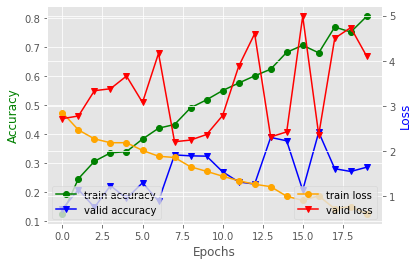

In [14]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [15]:
network1.predict(data_manager.X_test[0:10])

array([10, 12,  9, 10, 15,  8,  5, 19, 10, 10], dtype=int64)

Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

<Figure size 432x288 with 0 Axes>

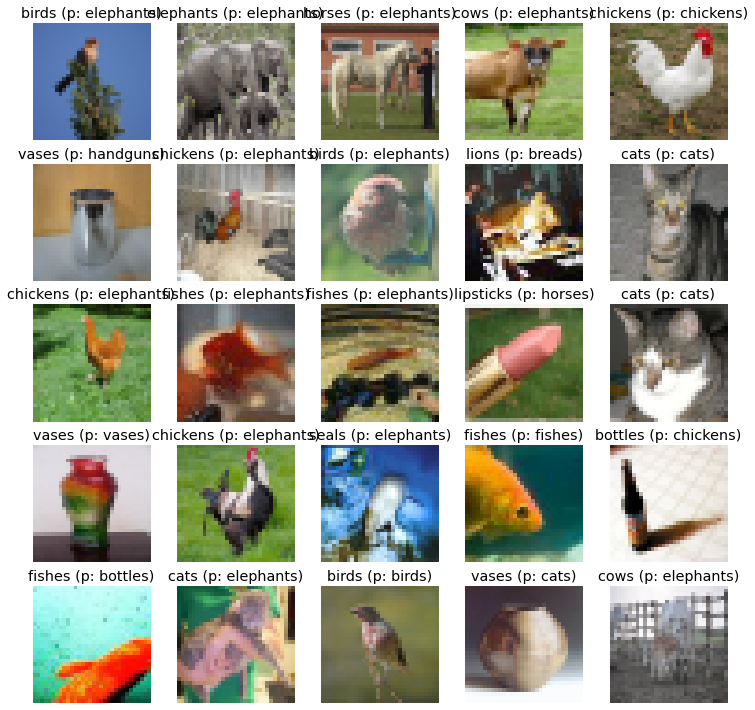

In [16]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

**For questions 3.1 to 3.7, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`:**

1. `Block architecture`: Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a `global average pooling (GAP)` layer to obtain vectors and then a dense layer to output the logits for the softmax layer.

When designing a block, there must have some instance variables as follows

2. `num_channels`: the number of channels used in a block, which will be applied to two Convs in the block.

3. `mean_pool (True, False)`: the mean pool is used not. If `mean_pool = True`, it is used to downsample the input by two.

4. `batch_norm (True, False)`: the batch normalization function is used or not. Setting `batch_norm` to `False` means not using batch normalization. 

5. The `skip connection (True, False)` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connectnion is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

The above network has two blocks with the numbers of channels are 16 and 32 respectively. We apply a global average pooling (GAP) layer to flattern the output of the last block, followed by an output layer for prediction.  

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [ ]:
tf.random.set_seed(1234)

<span style="color:red">**Question 3.1**</span> **Write the code of the `YourModel` class here. Note that this class will inherit from the `DefaultModel` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below. Note that the `YourModel` class   is inherited from the `DefaultModel` class.**

<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

In [18]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_classes=4, 
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=32,
                 num_epochs= 20,
                 learning_rate=0.001,
                 verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_classes, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, 
                                        learning_rate, verbose)
    
    def build_cnn(self):
        #Insert your code here


Now run your model with a specific configuration.

In [ ]:
#Your run here



<span style="color:red">**Question 3.2**</span> **Now, let us tune the number of blocks $num\_blocks \in \{3,4\}$, $use\_skip \in \{True, False\}$, $mean\_pool \in \{True, False\}$, and $learning\_rate \in \{0.001, 0.0001\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `False` for not showing the training details of each epoch.**
 
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

#*Report the best parameters and the testing accuracy here*

.....

In [ ]:
#Insert your code here. You can add more cells if necessary


<span style="color:red">**Question 3.3**</span> **We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also you need to incorporate early stopping to your training process. Specifically, you early stop the training if the valid accuracy cannot increase in three consecutive epochs.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Wtire your code in the cell below. Hint that you can rewrite the code of the `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

In [19]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_classes=4, 
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        #Reuse code of previous section here
    
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        #Insert your code here
        

Leverage your best model with the data augmentation and try to observe the difference in performance between using data augmentation and non-using it.

#*Write your answer and observation here*

.....

In [ ]:
#Insert your code here. You can add more cells if necessary


<span style="color:red">**Question 3.4**</span> **Exploring Data Mixup Technique for Improving Generalization Ability.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

#*Write your answer and observation here*

.....


In [ ]:
#Insert your code here. You can add more cells if necessary



<span style="color:red">**Question 3.5**</span> Implement the **one-versus-all (OVA)** loss. The details are as follows:
- You need to apply `the sigmoid activation function` to logits $h = [h_1, h_2,...,h_M]$ instead of `the softmax activation` function as usual to obtain $p = [p_1, p_2,...,p_M]$, meaning that $p_i = sigmoid(h_i), i=1,...,M$. Note that $M$ is the number of classes.
- Given a data example $x$ with the ground-truth label $y$, the idea is to maximize the likelihood $p_y$ and to minimize the likelihoods $p_i, i \neq y$. Therefore, the objective function is to find the model parameters to
  - $\max\left\{ \log p_{y}+\sum_{i\neq y}\log(1-p_{i})\right\}$ or equivalently $\min\left\{ -\log p_{y}-\sum_{i\neq y}\log(1-p_{i})\right\}$.
  - For example, if $M=3$ and $y=2$, you need to minimize $\min\left\{ -\log(1-p_{1})-\log p_{2}-\log(1-p_{3})\right\}$.

Compare the model trained with the OVA loss and the same model trained with the standard cross-entropy loss.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>



In [2]:
#Insert your code here. You can add more cells if necessary


<span style="color:red">**Question 3.6**</span> **Attack your best obtained model with PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.**
   
<div style="text-align: right"> <span style="color:red">[3 points]</span> </div>

In [ ]:
#Insert your code here. You can add more cells if necessary



<span style="color:red">**Question 3.7**</span> **Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [ ]:
#Insert your code here. You can add more cells if necessary



<span style="color:red">**Question 3.8 (Kaggle competition)**</span>
<div style="text-align: right"> <span style="color:red">[10 points]</span> </div10

You can reuse the best model obtained in this assignment or develop new models to evaluate on the **testing set of the FIT5215 Kaggle competion**. However, to gain any points for this question, your testing accuracy must **exceed** the accuracy threshold from a base model developed by us as shown in the leader board of the competition. 

The marks for this question are as follows:
- If you are in *top 10%*, you gain *10 points*.
- If you are in *top 20%*, you gain *8 points*.
- If you are in *top 30%*, you gain *6 points*.
- If you *win* our base model, you gain *4 points*. 

<span style="color:green">**Tips and requirements**</span>
- Your **team name** or **member name** using in this Kaggle competion must contain your student ID, which faciliates us in marking this question.
- You can use any deep/machine techniques in this Kaggle competition.
- We apply some slight transformations and add noises to unseen testing images to make the task more challenging. There is a slight shift between training distribution and testing distribution. 
- You must submit your code, trained model, and a brief document decribed your method followed a provided template.

--- 
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**
**<div style="text-align: center"> <span style="color:black">GOOD LUCK WITH YOUR ASSIGNMENT 1!</span> </div>**